In [43]:
import seaborn as sns
import pandas as pd
import numpy as np
model_data = pd.read_json(f"../final_output/ilp/test_snowflake_{9}.json")
model_data

,instance_count,execution_details,total_cost,total_cost_separated,status,total_time
0,2,"[{'instance_id': 'c5n.18xlarge', 'runtime': 0....",0.005341,0.006457,0,181.362778
1,1,"[{'instance_id': 'c5n.18xlarge', 'runtime': 1....",0.002030,0.003183,0,18.658010
2,1,"[{'instance_id': 'c5n.18xlarge', 'runtime': 8....",0.008791,0.012134,0,24.918566
3,2,"[{'instance_id': 'c5n.18xlarge', 'runtime': 0....",0.053399,0.057742,3,200.804260
4,2,"[{'instance_id': 'c5n.18xlarge', 'runtime': 8....",0.009766,0.014621,0,157.924056
5,2,"[{'instance_id': 'c5n.18xlarge', 'runtime': 3....",0.004157,0.010330,0,27.534700
6,2,"[{'instance_id': 'c5n.18xlarge', 'runtime': 3....",0.004163,0.006836,0,161.929698


Data collection

In [56]:
batches = []
cost = []
model = []
status = []
optimization = []

for batch_size in range(1, 20):
    model_data = pd.read_json(f"../final_output/ilp/test_snowflake_{batch_size}.json")
    model_data = model_data[model_data['status'] != 5]

    if len(model_data):
        cost.append(model_data['total_cost'].mean())
        batches.append(batch_size)
        model.append("ilp")

    model_data = pd.read_json(f"../final_output/ilp_bw/test_snowflake_{batch_size}.json")
    model_data = model_data[model_data['status'] != 5]

    if len(model_data):
        cost.append(model_data['total_cost'].mean())
        batches.append(batch_size)
        model.append("ilp_bw")


    cost.append(model_data['total_cost_separated'].mean())
    batches.append(batch_size)
    model.append("m4")

data = pd.DataFrame(
    data={
        "batch_size": batches,
        "cost": cost,
        "model": model
    }
)

data

,batch_size,cost,model
0,1,0.008119,ilp
1,1,0.008119,ilp_bw
2,1,0.008119,m4
3,2,0.009303,ilp
4,2,0.009304,ilp_bw
5,2,0.009495,m4
6,3,0.010730,ilp
7,3,0.010712,ilp_bw
8,3,0.010975,m4
9,4,0.010736,ilp


<Axes: xlabel='batch_size', ylabel='cost'>

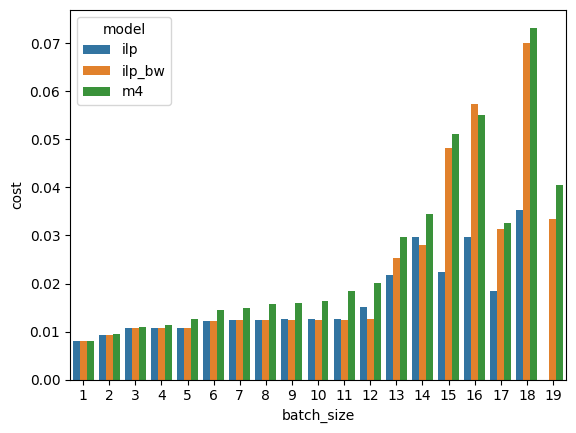

In [59]:
sns.barplot(data=data, x='batch_size', y="cost", hue="model")

In [66]:
def calc_opt(row):
    return (row["total_cost_separated"] - row["total_cost"])/row["total_cost_separated"] * 100

In [136]:
batches = []
optimization = []
status = []

for batch_size in range(1, 20):
    model_data = pd.read_json(f"../final_output/ilp/test_snowflake_{batch_size}.json")
    model_data = model_data[model_data['status'] != 5]

    if len(model_data):
        model_data["optimization"] = model_data.apply(calc_opt, axis=1)
        res = model_data[["status", "optimization"]].groupby("status").agg([np.mean])
        if len(res) == 2:
            for s in [0, 3]:
                batches.append(batch_size)
                status.append("Optimal" if s==0 else "Feasible")
                optimization.append(res.loc[s]["optimization"]["mean"])


data = pd.DataFrame(
    data={
        "batch_size": batches,
        "status": status,
        "optimization": optimization
    }
)
data

,batch_size,status,optimization
0,9,Optimal,35.520187
1,9,Feasible,7.521276
2,10,Optimal,42.706974
3,10,Feasible,12.056060
4,11,Optimal,50.200182
5,11,Feasible,27.334191
6,12,Optimal,53.109194
7,12,Feasible,39.657418


<Axes: xlabel='batch_size', ylabel='optimization'>

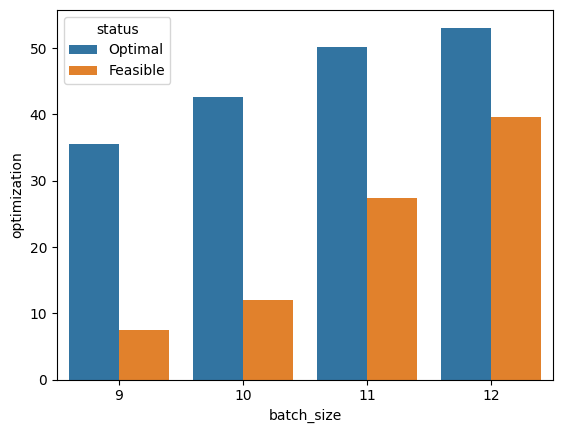

In [139]:
sns.barplot(data=data, x='batch_size', y="optimization", hue="status")